# Bepaling van warmtecapaciteit van een onbekend materiaal


# Introductie

Onbekende materialen kunnen geïdentificeerd worden door hun eigenschappen te meten. Een van deze eigenschappen is de warmtecapaciteit. In dit practicum gaan we de warmtecapaciteit van een onbekend materiaal bepalen door middel van een calorimeter experiment. Daarbij wordt een bepaalde massa van het materiaal naar een bekende temperatuur gebracht waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaatst. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend.

# Theorie

De soortelijke warmte $c$ van een materiaal is gedefinieerd als de hoeveelheid warmte $Q$ die nodig is om de temperatuur $T$ van een kilogram van het materiaal met één graad Celsius (of één Kelvin) te verhogen:

$$
    c = \frac{Q}{m \Delta T}
$$ (eq:heat_capacity)

Waarbij $Q$ de hoeveelheid warmte in Joules is, $m$ de massa in kilogram is en $\Delta T$ de verandering in temperatuur is. Gegeven de wet van Black, die stelt dat de totale hoeveelheid warmte in een geïsoleerd systeem constant blijft, kunnen we de warmte die het onbekende materiaal verliest gelijkstellen aan de warmte die het water opneemt:

$$
    Q_{materiaal} = -Q_{water} 
$$ (eq:black)

wanneer we de massa's en de begintemperaturen van beide systemen kennen, maar slechts een van de twee soortelijke warmtes, kunnen we de onbekende soortelijke warmte berekenen. We combineren vergelijkingen [](#eq:heat_capacity) en [](#eq:black) om de volgende vergelijking te krijgen:

$$
    T_e = \frac{c_w m_w T_{w,b}+c_m m_m T_{m,b}}{c_w m_w + c_m m_m}
$$ (eq:combined)

Waarbij de subscripts $b$ en $e$ respectievelijk staan voor begintoestand en eindtoestand, $w$ voor water en $m$ voor het onbekende materiaal.

Bij metingen aan verschillende massa's van het onbekende materiaal en vervolgens een least square fit aan bovenstaande vergelijking kunnen we een precieze waarde voor de soortelijke warmte van het onbekende materiaal bepalen. Dat is, wanneer de warmtecapaciteit van bijvoorbeeld de beker te verwaarlozen is.


# Methode en materialen

## Ontwerp
De bovenstaande theorie wordt gebruikt om de soortelijke warmte van een onbekend materiaal te bepalen. Het experiment bestaat uit het verwarmen van verschillende massa's van het onbekende materiaal tot een bekende temperatuur, waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaats. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend. Om de tijd voor het meten van meerdere materialen te reduceren, worden de data van de verschillende groepen in het lokaal samengevoegd. Van tevoren is afgesproken welke massa's door welke groep worden gemeten, en hoeveel water er gebruikt wordt.

## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Calorimeter
- Thermometer of temperatuursensor
- Verwarmingsbron 
- Diverse massablokjes van onbekend materiaal
- Weegschaal
- Water
- Maatcilinder of maatbeker


```{figure} figures/c_onbekend_setup.jpg
:width: 70%
:label: fig_c_onbekend_setup

Een schematische weergave van de opstelling

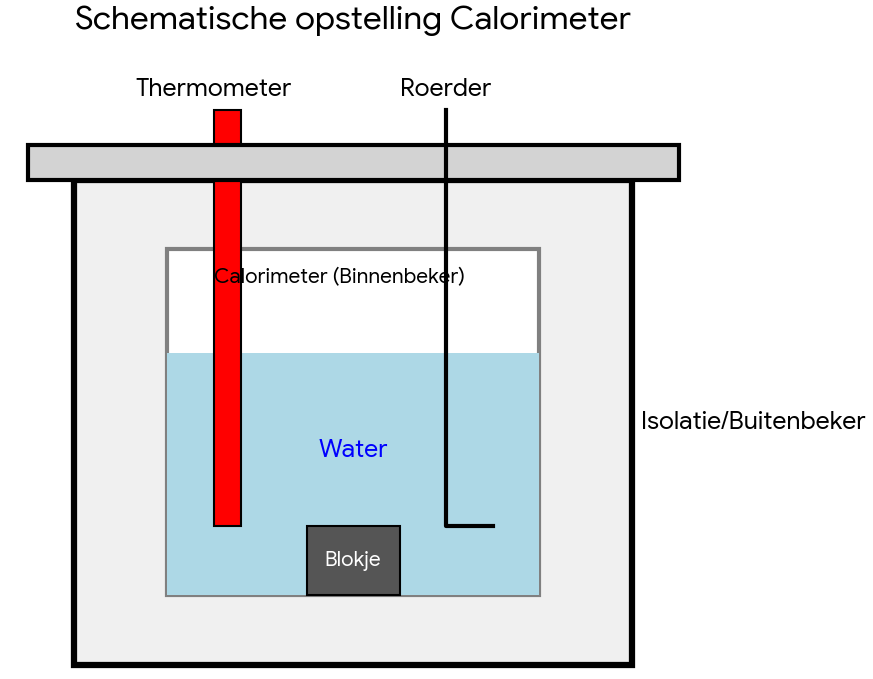
```


## Procedure
Bespreek wie welke massa's van het onbekende materiaal gaat meten.
Bespreek ook hoeveel water er gebruikt gaat worden.
Bepaal de begintemperaturen.
Hevel het aantal afgesproken massa's in de maatbeker. 
Roer voorzicht zodat de temperatuur homogeen is.
Noteer de hoogste gemeten temperatuur, dit is $T_e$.
Wissel de metingen uit met de andere groepen en voer de data-analyse uit.

```{note}
Hieronder staat een voorbeeld hoe je een grafiek moet opslaan en vervolgens in je document kunt oproepen.
Het voorbeeld kun je natuurlijk straks verwijderen.
```

# Resultaten


In [2]:

import numpy as np
import matplotlib.pyplot as plt

#Ruwe data 
massa= np.array([0.050,0.1,0.2,0.3,0.4,0.5]) #Kg
Koud_water =np.array([0.1000,0.075,0.075,0.25,0.25,0.25]) #L
t_beginwater=np.array([21.3,21.6,21.3,21.5,20.8,21.1])
t_beginblokje=np.array([69.3,69.3,69.3,69.3,69.3,69.3])
t_eind= np.array([25.1,30.2,35.8,28.3,30.0,32.1])

c_water = 4186 # J/(kg*K)



In [11]:
#Berekening delta T
dt_water =t_eind - t_beginwater
dt_blokje = t_beginblokje - t_eind

# Berekening Q_water (Warmte opgenomen door water)
Q_water= c_water* Koud_water*dt_water

#Berekening C_blokje (soortelijke warmte materiaal)
# vergelijking : c_m =Q_water/ (m_m *dt_m)
c_blokje=Q_water/ (massa*dt_blokje)

# Resultaten weergeven
print("Berekende soortelijke warmte (J/kg*K) per meting:")
print(np.round(c_blokje, 1))
print(f"Gemiddelde soortelijke warmte: {np.mean(c_blokje):.1f} J/kg*K")

Berekende soortelijke warmte (J/kg*K) per meting:
[719.8 690.5 679.4 578.6 612.5 618.9]
Gemiddelde soortelijke warmte: 649.9 J/kg*K


In [ ]:
import os

# Controleer of de map 'figures' bestaat, zo niet: maak hem aan
if not os.path.exists('figures'):
    os.makedirs('figures')

#Deze code is slechts voor de plt.savefig..... Python maakt een map automatsiche aan voor het figuur 

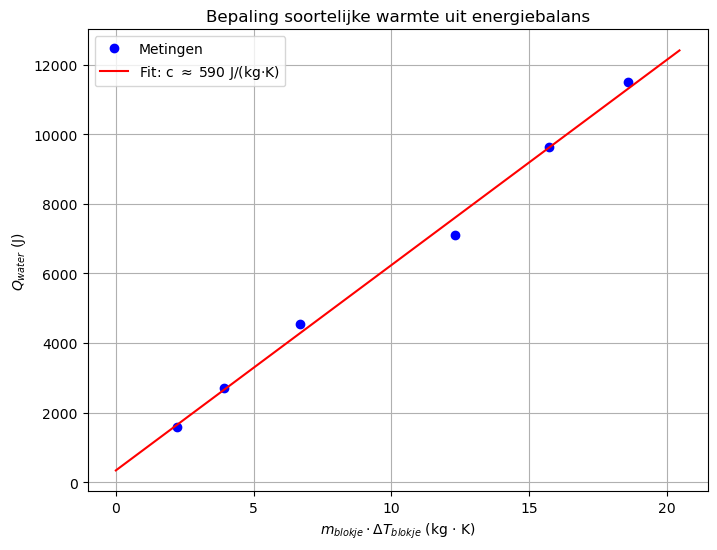

In [17]:
# Grafiek maken (Lineaire fit)
# We plotten Q_water tegen (m_blokje * dt_blokje). 
# De richtingscoëfficiënt is dan c_blokje.
x_val = massa * dt_blokje
y_val = Q_water

# Fit berekenen (y = ax + b)
coeffs = np.polyfit(x_val, y_val, 1)
trendlijn = np.poly1d(coeffs)
x_lijn = np.linspace(0, max(x_val)*1.1, 100)

plt.figure(figsize=(8,6))
plt.plot(x_val, y_val, 'bo', label='Metingen')
plt.plot(x_lijn, trendlijn(x_lijn), 'r-', label=f'Fit: c $\\approx$ {coeffs[0]:.0f} J/(kg·K)')

plt.xlabel(r'$m_{blokje} \cdot \Delta T_{blokje}$ (kg $\cdot$ K)')
plt.ylabel(r'$Q_{water}$ (J)')
plt.title('Bepaling soortelijke warmte uit energiebalans')
plt.legend()
plt.grid(True)
plt.savefig("figures/warmtecapaciteit_resultaat.png", dpi=300)
plt.show()

```{figure} figures/warmtecapaciteit_resultaat.png
:width: 50%
:label: fig_warmtecapaciteit_fit 

Hier is het onderschrift van de figuur.

Bepaling van de soortelijke warmtecapaciteit door middel van een lineaire fit. Op de y-as staat de opgenomen warmte door het water ($Q_{water}$) en op de x-as het product van de massa en het temperatuurverschil van het blokje ($m_{blokje} \cdot \Delta T_{blokje}$). De richtingscoëfficiënt van de getrokken lijn correspondeert met de soortelijke warmte $c$ van het materiaal.

```


# Conclusie

Op basis van de metingen is de soortelijke warmtecapaciteit van het onbekende materiaal bepaald. 

  - Het gemiddelde van de afzonderlijke berekeningen is 649 J/(kg·K).

  - De richtingscoëfficiënt van de lineaire fit geeft een waarde van 588 J/(kg·K). 

De metingen vertonen spreiding, waarbij de fit-methode over het algemeen betrouwbaarder is omdat deze minder gevoelig is voor uitschieters. We concluderen dat de soortelijke warmte van het materiaal rond de 600 - 650 J/(kg·K) ligt.


# Discussie

Wanneer we deze waarde vergelijken met bekende tabelwaarden:
  Staal / IJzer: $\approx 460$ J/(kg·K)
  Glas: $\approx 840$ J/(kg·K)
  Aluminium: $\approx 900$ J/(kg·K)
  Messing: $\approx 380$ J/(kg·K)
  
De gemeten waarde ligt tussen staal en glas in. Er zijn echter twee belangrijke systematische fouten in dit experiment die de waarde omlaag drukken, waardoor het waarschijnlijk Glas of Aluminium zou kunnen zijn:
  
  - Warmteverlies aan de omgeving: Tijdens het overbrengen van het blokje naar het water en tijdens het roeren koelt het systeem af. Hierdoor meten we een lagere eindtemperatuur $T_e$.
  
  - Warmtecapaciteit calorimeter: We hebben aangenomen dat $Q_{water} = -Q_{blokje}$. In werkelijkheid neemt ook de beker zelf warmte op ($Q_{water} + Q_{beker} = -Q_{blokje}$). Omdat we $Q_{beker}$ verwaarlozen, onderschatten we de totale energie die het blokje heeft afgestaan. De berekende $c_{blokje}$ valt hierdoor lager uit dan de werkelijkheid.
  
Gezien deze systematische onderschatting is het aannemelijk dat het werkelijke materiaal een hogere warmtecapaciteit heeft, zoals glas of aluminium, maar dat door de warmteverliezen een waarde van ~600 J/(kg·K) is gevonden.